# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where 
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed. 
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

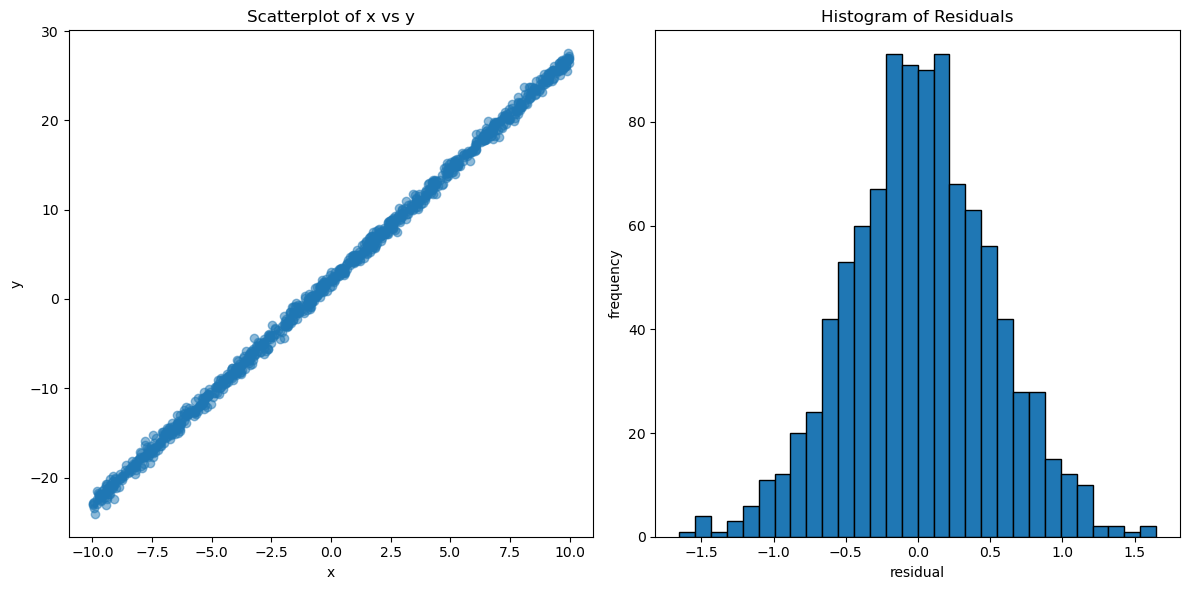

In [2]:
w = 2.5  # Example weight
b = 2.0  # Example bias

n_samples = 1000
noise_std = 0.5 

#normal distributed
x = np.random.uniform(-10, 10, n_samples)

noise = np.random.normal(0, noise_std, n_samples)

#output data 
y = w*x+b+noise 

#residuals 
residuals = y-(w*x+b)

#plotting x vs y 

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(x,y, alpha=0.5)
plt.title('Scatterplot of x vs y')
plt.xlabel('x')
plt.ylabel('y')

#histogram
plt.subplot(1,2,2)
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('residual')
plt.ylabel('frequency')

plt.tight_layout()
plt.show()




2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

In [4]:
import numpy as np

def model_loop(x, w, b):
    y = np.zeros_like(x)  # Initialize y with the same shape as x
    for i in range(len(x)):
        y[i] = w * x[i] + b  # Use x[i] instead of xi
    return y  # Return y directly, no need to convert to np.array

# compute y = wx + b without any loops
def model_np(x, w, b):
    return w * x + b

# Test the functions with example data
np.random.seed(0)
x = np.random.uniform(0, 10, 1000)  
w = 2.5  # Example weight
b = 5.0  # Example bias

# Calculate y using both functions
y_loop = model_loop(x, w, b)
y_np = model_np(x, w, b)

# Verify that the outputs are identical
identical_output = np.allclose(y_loop, y_np)
print(f"Do both functions produce identical output? {identical_output}")


Do both functions produce identical output? True


3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

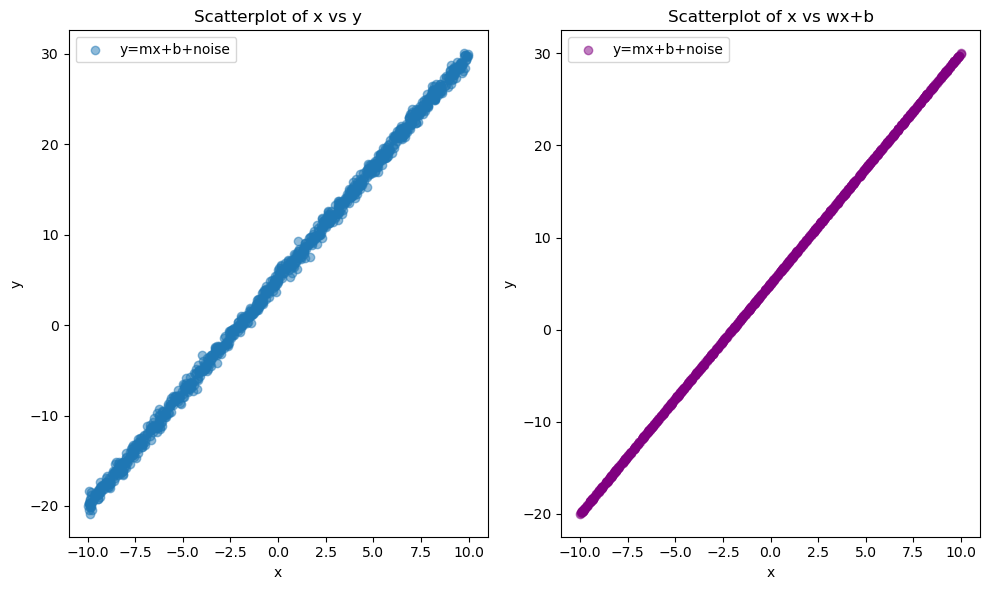

In [6]:
# Parameters from Exercise 1
w = 2.5  # Weight
b = 5.0  # Bias
noise_std=0.5
n_samples = 1000

# Generate the dataset (same as in Exercise 1)
np.random.seed(40)
x = np.random.uniform(-10, 10, n_samples)  # 1000 examples, x values between 0 and 10

# normally distributed noise
noise = np.random.normal(0, noise_std, n_samples)
y = w * x + b + noise  

linear_y = w * x + b  

# Plot x vs y (actual data) and x vs wx + b (predicted data)
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
plt.scatter(x,y, alpha=0.5, label='y=mx+b+noise')
plt.title('Scatterplot of x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#without noise 
plt.subplot(1,2,2)
plt.scatter(x,linear_y, alpha=0.5, color='purple', label='y=mx+b+noise')
plt.title('Scatterplot of x vs wx+b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant. 
   * Plot the cost vs $b$ for the dataset, holding $w$ constant. 


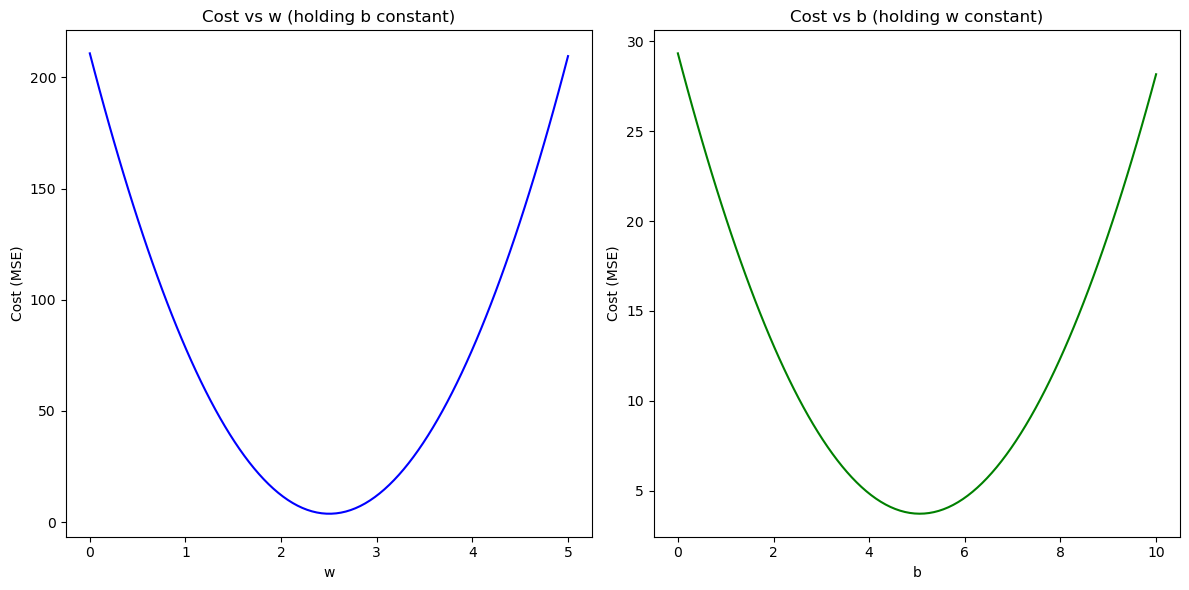

In [7]:
# Function to compute the mean squared error (MSE)
def cost(x, y, w, b):
    # Calculate the predicted y values using the model y = wx + b
    y_pred = w * x + b
    # Calculate the MSE
    mse = np.mean((y_pred - y) ** 2)
    return mse

# Parameters from Exercise 1
w_true = 2.5  # True weight
b_true = 5.0  # True bias

# Generate the dataset (same as in Exercise 1)
np.random.seed(0)
x = np.random.uniform(0, 10, 1000)  # 1000 examples, x values between 0 and 10
noise = np.random.normal(0, 2, 1000)  # Noise with mean 0 and standard deviation 2
y = w_true * x + b_true + noise  # Actual y values with noise

# Plot 1: Cost vs w, holding b constant
w_values = np.linspace(0, 5, 100)  # Range of w values to evaluate
cost_values_w = [cost(x, y, w, b_true) for w in w_values]  # Compute cost for each w

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(w_values, cost_values_w, color='blue')
plt.title('Cost vs w (holding b constant)')
plt.xlabel('w')
plt.ylabel('Cost (MSE)')

# Plot 2: Cost vs b, holding w constant
b_values = np.linspace(0, 10, 100)  # Range of b values to evaluate
cost_values_b = [cost(x, y, w_true, b) for b in b_values]  # Compute cost for each b

plt.subplot(1, 2, 2)
plt.plot(b_values, cost_values_b, color='green')
plt.title('Cost vs b (holding w constant)')
plt.xlabel('b')
plt.ylabel('Cost (MSE)')

plt.tight_layout()
plt.show()


5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant. 
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant. 

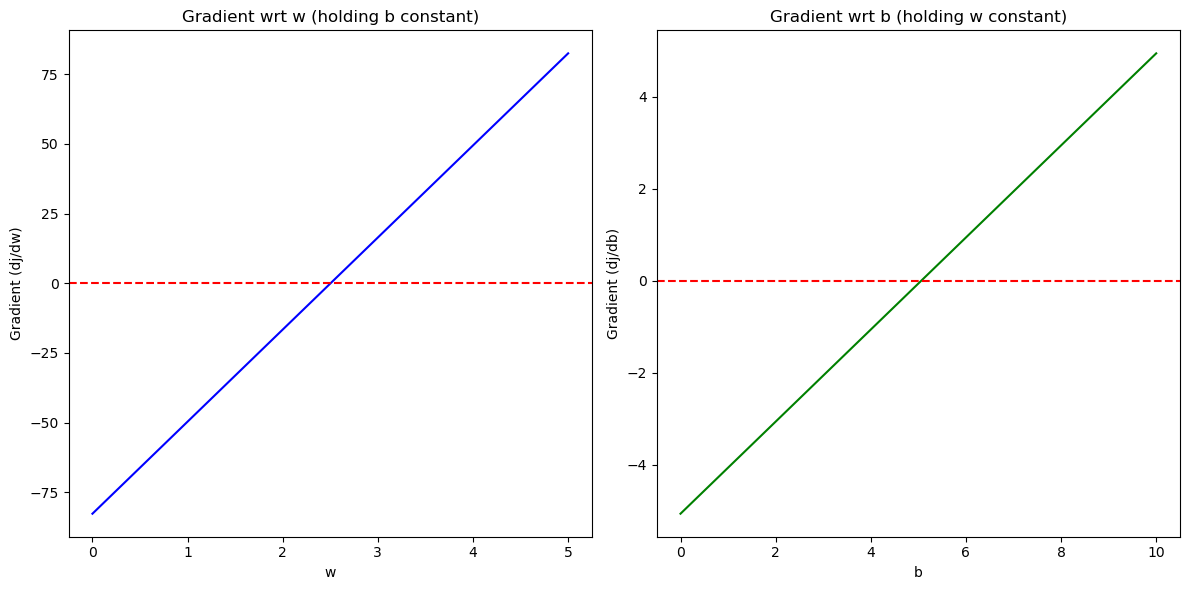

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the gradients with respect to w and b
def gradient(x, y, w, b):
    # Number of examples
    m = len(x)
    
    # Compute the predicted y values using the model y = wx + b
    y_pred = w * x + b
    
    # Compute the gradients with respect to w and b
    dj_dw = (1/m) * np.sum((y_pred - y) * x)
    dj_db = (1/m) * np.sum(y_pred - y)
    
    return dj_dw, dj_db

# Parameters from Exercise 1
w_true = 2.5  # True weight
b_true = 5.0  # True bias

# Generate the dataset (same as in Exercise 1)
np.random.seed(0)
x = np.random.uniform(0, 10, 1000)  # 1000 examples, x values between 0 and 10
noise = np.random.normal(0, 2, 1000)  # Noise with mean 0 and standard deviation 2
y = w_true * x + b_true + noise  # Actual y values with noise

# Plot 1: Gradient wrt w, holding b constant
w_values = np.linspace(0, 5, 100)  # Range of w values to evaluate
gradient_w_values = [gradient(x, y, w, b_true)[0] for w in w_values]  # Compute gradient wrt w

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(w_values, gradient_w_values, color='blue')
plt.axhline(0, color='red', linestyle='--')  # Line at gradient = 0
plt.title('Gradient wrt w (holding b constant)')
plt.xlabel('w')
plt.ylabel('Gradient (dj/dw)')

# Plot 2: Gradient wrt b, holding w constant
b_values = np.linspace(0, 10, 100)  # Range of b values to evaluate
gradient_b_values = [gradient(x, y, w_true, b)[1] for b in b_values]  # Compute gradient wrt b

plt.subplot(1, 2, 2)
plt.plot(b_values, gradient_b_values, color='green')
plt.axhline(0, color='red', linestyle='--')  # Line at gradient = 0
plt.title('Gradient wrt b (holding w constant)')
plt.xlabel('b')
plt.ylabel('Gradient (dj/db)')

plt.tight_layout()
plt.show()


6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`. 

In [1]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:    
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 

Iteration    0: Cost 4.62e+01  dj_dw: -2.150e+02, dj_db: -3.491e+01   w:  2.150e+00, b: 3.49123e-01
Iteration  100: Cost 5.76e+00  dj_dw:  2.140e-01, dj_db: -1.415e+00   w:  2.907e+00, b: 2.33776e+00
Iteration  200: Cost 4.48e+00  dj_dw:  1.297e-01, dj_db: -8.573e-01   w:  2.739e+00, b: 3.44789e+00
Iteration  300: Cost 4.00e+00  dj_dw:  7.855e-02, dj_db: -5.194e-01   w:  2.637e+00, b: 4.12048e+00
Iteration  400: Cost 3.83e+00  dj_dw:  4.759e-02, dj_db: -3.147e-01   w:  2.575e+00, b: 4.52796e+00
Iteration  500: Cost 3.77e+00  dj_dw:  2.883e-02, dj_db: -1.906e-01   w:  2.538e+00, b: 4.77484e+00
Iteration  600: Cost 3.74e+00  dj_dw:  1.747e-02, dj_db: -1.155e-01   w:  2.515e+00, b: 4.92442e+00
Iteration  700: Cost 3.74e+00  dj_dw:  1.058e-02, dj_db: -6.998e-02   w:  2.502e+00, b: 5.01504e+00
Iteration  800: Cost 3.73e+00  dj_dw:  6.412e-03, dj_db: -4.240e-02   w:  2.493e+00, b: 5.06994e+00
Iteration  900: Cost 3.73e+00  dj_dw:  3.885e-03, dj_db: -2.569e-02   w:  2.488e+00, b: 5.10320e+00


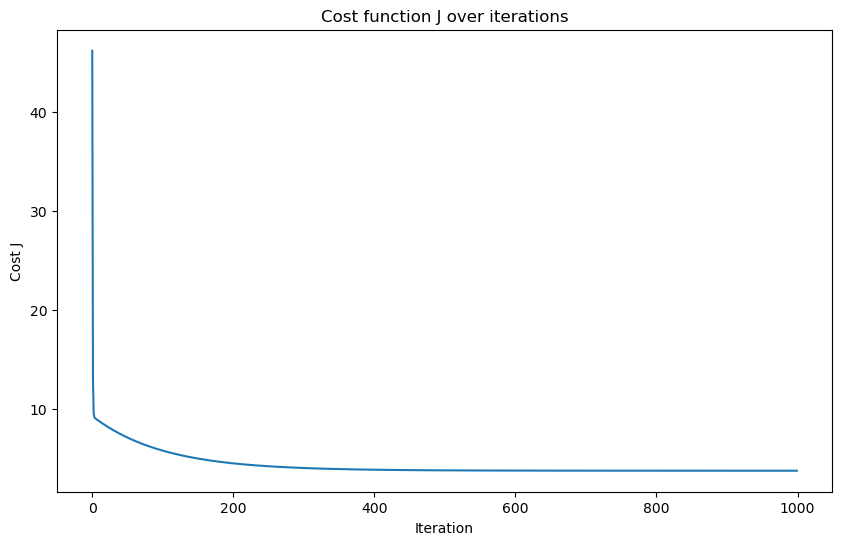

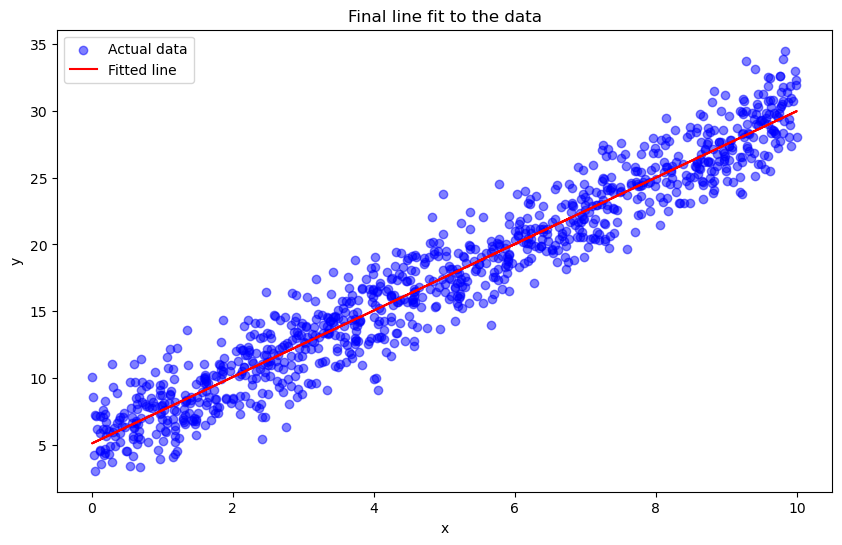

In [12]:
import copy
import math


def gradient(x,y,w,b):
    m = len(y)
    predictions = w * x + b
    dj_dw = (2/m) * np.sum((predictions - y) * x)
    dj_db = (2/m) * np.sum(predictions-y)
    return dj_dw, dj_db

def cost(x,y,w,b):
    predictions = w * x + b
    errors = predictions - y
    mse = np.mean(errors ** 2)
    return mse

# Gradient Descent function
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    b = b_in
    
    J_history = []
    p_history = []

    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w, b)     

        # Update parameters
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i < 100000:    
            J_history.append(cost(x, y, w, b))
            p_history.append([w, b])
            
        # Print progress
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history

# Parameters from Exercise 1
w_true = 2.5  # True weight
b_true = 5.0  # True bias

# Generate the dataset (same as in Exercise 1)
np.random.seed(0)
x = np.random.uniform(0, 10, 1000)  # 1000 examples, x values between 0 and 10
noise = np.random.normal(0, 2, 1000)  # Noise with mean 0 and standard deviation 2
y = w_true * x + b_true + noise  # Actual y values with noise

# Initialize parameters (start away from optimal values)
w_initial = 0.0  # Initial weight (away from the true value)
b_initial = 0.0  # Initial bias (away from the true value)
alpha = 0.01     # Learning rate
num_iters = 1000 # Number of iterations

# Run gradient descent
w_final, b_final, J_history, p_history = gradient_descent(x, y, w_initial, b_initial, alpha, num_iters, cost, gradient)

# Final parameters after gradient descent
print("\nFinal parameters:")
print(f"w: {w_final}")
print(f"b: {b_final}")

# Plot the cost history
plt.figure(figsize=(10, 6))
plt.plot(J_history)
plt.title("Cost function J over iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.show()

# Plot the final line fit to the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, label='Actual data')
plt.plot(x, model_np(x, w_final, b_final), color='red', label='Fitted line')
plt.title('Final line fit to the data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


7. Plot the cost and parameters versus iteration of gradient descent.

Iteration    0: Cost 2.26e+01  dj_dw: -1.700e+02, dj_db: -1.125e+00   w:  1.700e+00, b: 1.12455e-02
Iteration  100: Cost 2.63e-01  dj_dw: -1.660e-03, dj_db: -2.824e-01   w:  2.495e+00, b: 9.10169e-01
Iteration  200: Cost 2.44e-01  dj_dw: -2.207e-04, dj_db: -3.754e-02   w:  2.496e+00, b: 1.03028e+00
Iteration  300: Cost 2.44e-01  dj_dw: -2.934e-05, dj_db: -4.990e-03   w:  2.496e+00, b: 1.04625e+00
Iteration  400: Cost 2.44e-01  dj_dw: -3.900e-06, dj_db: -6.633e-04   w:  2.496e+00, b: 1.04837e+00
Iteration  500: Cost 2.44e-01  dj_dw: -5.184e-07, dj_db: -8.817e-05   w:  2.496e+00, b: 1.04865e+00
Iteration  600: Cost 2.44e-01  dj_dw: -6.891e-08, dj_db: -1.172e-05   w:  2.496e+00, b: 1.04869e+00
Iteration  700: Cost 2.44e-01  dj_dw: -9.160e-09, dj_db: -1.558e-06   w:  2.496e+00, b: 1.04869e+00
Iteration  800: Cost 2.44e-01  dj_dw: -1.218e-09, dj_db: -2.071e-07   w:  2.496e+00, b: 1.04869e+00
Iteration  900: Cost 2.44e-01  dj_dw: -1.619e-10, dj_db: -2.753e-08   w:  2.496e+00, b: 1.04869e+00


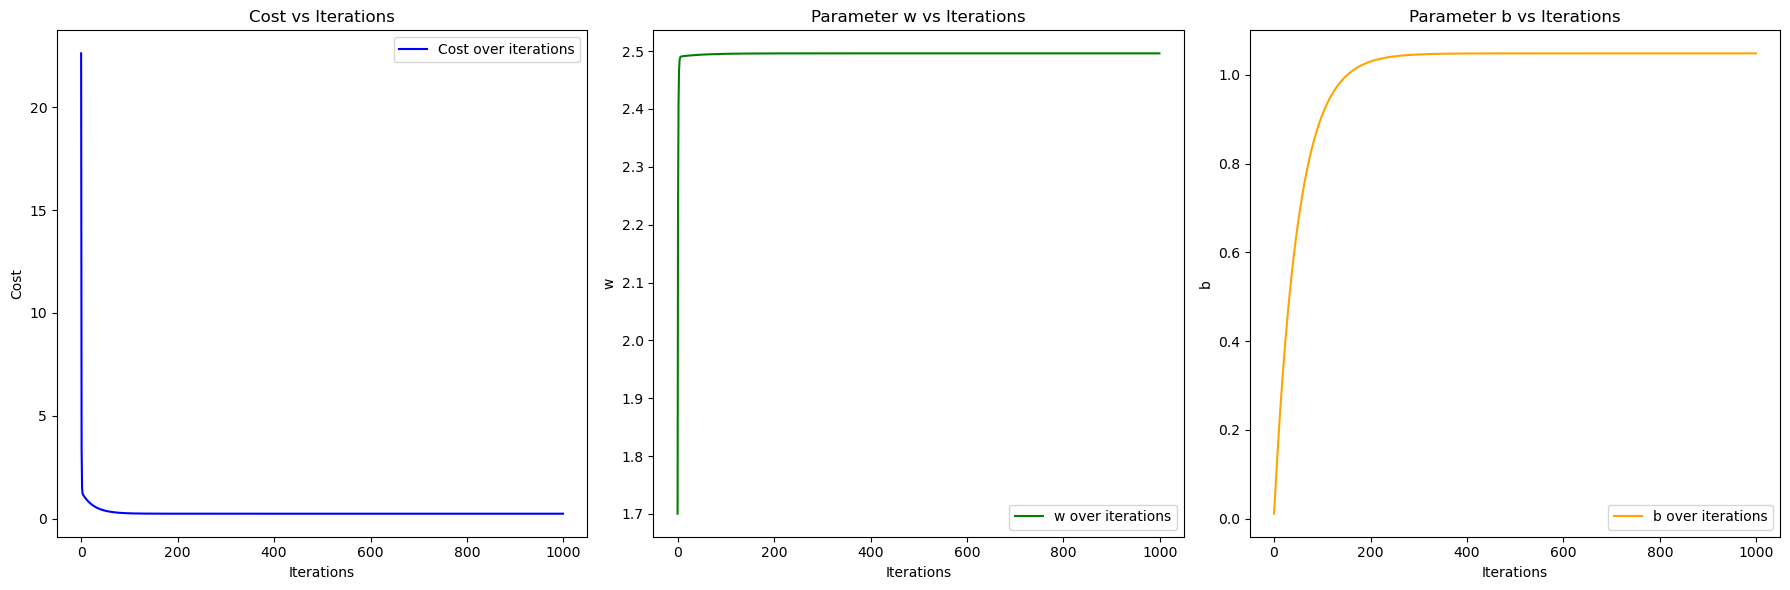

Optimal w: 2.4961303709128453
Optimal b: 1.0486938366508207


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

# Define the gradient function
def gradient(x, y, w, b):
    m = len(y)
    predictions = w * x + b
    dj_dw = (2 / m) * np.sum((predictions - y) * x)
    dj_db = (2 / m) * np.sum(predictions - y)
    return dj_dw, dj_db

# Define the cost function
def cost(x, y, w, b):
    predictions = w * x + b
    errors = predictions - y
    mse = np.mean(errors ** 2)
    return mse

# Define the gradient descent function
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in)
    b = b_in
    
    J_history = []
    w_history = []
    b_history = []

    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w, b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i < 100000:    
            J_history.append(cost(x, y, w, b))
            w_history.append(w)
            b_history.append(b)
            
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, w_history, b_history

# Parameters
w_true = 2.5
b_true = 1.0
noise_std = 0.5
n_samples = 1000

# Generate input data
np.random.seed(42)
x = np.random.uniform(-10, 10, n_samples)
noise = np.random.normal(0, noise_std, n_samples)
y = w_true * x + b_true + noise

# Initial parameters for gradient descent
w_init = 0.0  # Initial value of w
b_init = 0.0  # Initial value of b
alpha = 0.01  # Learning rate
num_iters = 1000  # Number of iterations

# Run gradient descent
w_opt, b_opt, J_history, w_history, b_history = gradient_descent(x, y, w_init, b_init, alpha, num_iters, cost, gradient)

# Plot cost vs iterations
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(J_history, label='Cost over iterations', color='blue')
plt.title('Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()

# Plot w vs iterations
plt.subplot(1, 3, 2)
plt.plot(w_history, label='w over iterations', color='green')
plt.title('Parameter w vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('w')
plt.legend()

# Plot b vs iterations
plt.subplot(1, 3, 3)
plt.plot(b_history, label='b over iterations', color='orange')
plt.title('Parameter b vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('b')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Optimal w: {w_opt}")
print(f"Optimal b: {b_opt}")